In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), done.


In [ ]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks"

 Behavioural_cloning.ipynb
 Computational_neural_network.ipynb
'Copy of Copy of Copy of data_preprocessing_tools.ipynb'
'Copy of Copy of data_preprocessing_tools.ipynb'
'Copy of data_preprocessing_template (1).ipynb'
'Copy of data_preprocessing_template.ipynb'
'Copy of data_preprocessing_tools (1).ipynb'
'Copy of data_preprocessing_tools (2).ipynb'
'Copy of data_preprocessing_tools.ipynb'
'Copy of multiple_linear_regression.ipynb'
'Copy of polynomial_regression.ipynb'
'Copy of simple_linear_regression.ipynb'
'Copy of support_vector_regression.ipynb'
'Copy of Welcome To Colaboratory'
'Copy of Welcome To Colaboratory (1)'
'Copy of Welcome To Colaboratory (2)'
 data_preprocessing_template.ipynb
 data_preprocessing_tools.ipynb
'Regression (1).ipynb'
 Regression.ipynb
 support_vector_regression.ipynb
 traffic_sign_recognition.ipynb
 Untitled0.ipynb
'zalando (1).ipynb'
 zalando.ipynb


In [ ]:
from matplotlib import colors
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow  as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional  import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Model
import pickle
import random
import pandas as pd

In [ ]:
with open('german-traffic-signs/train.p','rb')as f:
  train_data=pickle.load(f)
with open('german-traffic-signs/valid.p','rb')as f:
  valid_data=pickle.load(f)
with open('german-traffic-signs/test.p','rb')as f:
  test_data=pickle.load(f)
#print(type(train_data))

X_train,y_train=train_data['features'],train_data['labels']
X_valid,y_valid=valid_data['features'],valid_data['labels']
X_test,y_test=test_data['features'],test_data['labels']

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
assert(X_train.shape[0]==y_train.shape[0]),'The no of images is not equal to no of labels'
assert(X_valid.shape[0]==y_valid.shape[0]),'The no of images is not equal to no of labels'
assert(X_test.shape[0]==y_test.shape[0]),'The no of images is not equal to no of labels'
assert(X_train.shape[1:]==(32,32,3)),'The dimensions of the images are not 32,32,3'
assert(X_valid.shape[1:]==(32,32,3)),'The dimensions of the images are not 32,32,3'
assert(X_test.shape[1:]==(32,32,3)),'The dimensions of the images are not 32,32,3'

In [ ]:
data=pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

(32, 32, 3)


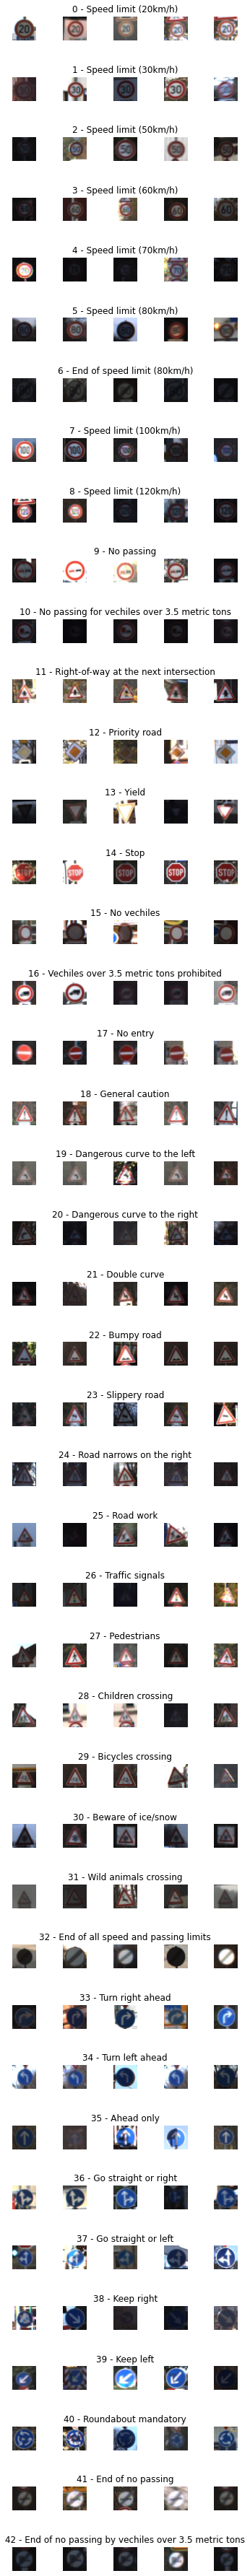

In [ ]:
num_of_sample=[]
cols=5
num_classes=43
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
print(X_train[1000].shape)
for i in range(cols):
    for j, row in data.iterrows():
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + " - " + row["SignName"])
        num_of_sample.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


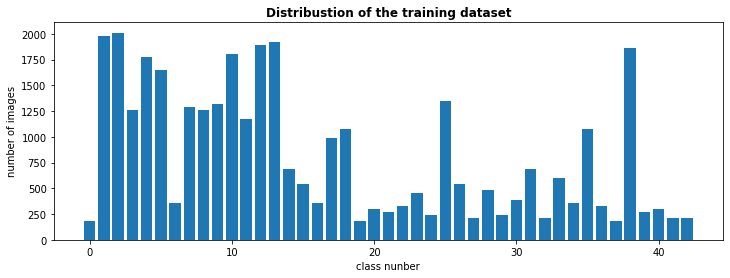

In [ ]:
print(num_of_sample)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_sample)
plt.title('Distribustion of the training dataset',fontweight='bold')
plt.xlabel('class nunber')
plt.ylabel('number of images')
plt.show()

(32, 32, 3)
36


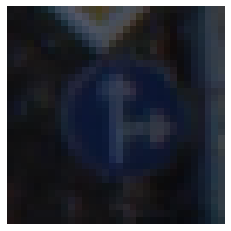

In [ ]:
import cv2

plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


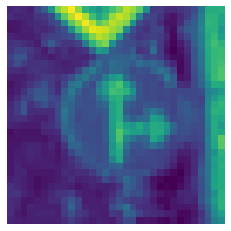

In [ ]:
def grayscale(img):
  img =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img
img=grayscale(X_train[1000])
plt.imshow(img)
plt.axis('off')
print(img.shape)

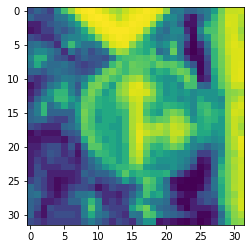

In [ ]:
def equalize(img):
  img=cv2.equalizeHist(img)
  return img

img=equalize(img)
plt.imshow(img)


In [ ]:
def preprocessing(img):
  img=grayscale(img)
  img=equalize(img)
  img=img/255
  return img

X_train= np.array(list(map(preprocessing,X_train)))
X_valid= np.array(list(map(preprocessing,X_valid)))
X_test= np.array(list(map(preprocessing,X_test)))

(34799, 32, 32)


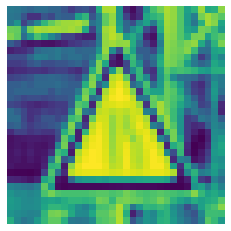

In [ ]:
plt.imshow(X_train[random.randint(0,len(X_train-1))])
plt.axis('off')
print(X_train.shape)

In [ ]:
X_train=X_train.reshape(34799,32,32,1)
X_test=X_test.reshape(12630,32,32,1)
X_valid=X_valid.reshape(4410,32,32,1)

In [ ]:
from keras.preprocessing.image import  ImageDataGenerator
datagen=ImageDataGenerator(width_shift_range=0.1,
                          height_shift_range=0.1,
                          zoom_range=0.2,
                          shear_range=0.1,
                          rotation_range=10)

datagen.fit(X_train)

In [ ]:
batches=datagen.flow(X_train,y_train,batch_size=15)
X_batch, y_batch=next(batches)
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()

for i in range(15):
  axs[i].imshow(X_batch[i].reshape(32,32),cmap=plt.get_cmap('gray'))
  axs[i].axis('off')
  

In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

In [ ]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_valid=to_categorical(y_valid,43)
y_valid.shape

In [ ]:
# def leNet_model():
#     model=Sequential()
#     model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Conv2D(30,(3,3),activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2,2)))
#     model.add(Flatten())
#     model.add(Dense(500,activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_classes,activation='softmax'))
#     model.compile(Adam(0.001),loss='categorical_crossentropy',metrics=['accuracy'])
#     return model

def modified_model():
    model=Sequential()
    model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu'))
    model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(30,(3,3),activation='relu'))
    model.add(Conv2D(30,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    # model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(Adam(0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model=modified_model()
print(model.summary())


In [ ]:
steps_per_epoch=len(X_train)//50
print(steps_per_epoch)

695


In [ ]:
# h=model.fit(x=X_train,y=y_train,epochs=10,verbose=1,batch_size=400,validation_data=(X_valid,y_valid),shuffle=True)
h = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                            steps_per_epoch=695,
                            epochs=10,
                            validation_data=(X_valid, y_valid), shuffle = 1)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.xlabel('epoch')
plt.title(['loss','Var_Loss'])
plt.legend(['Loss','val_Loss'])
# plt.show()



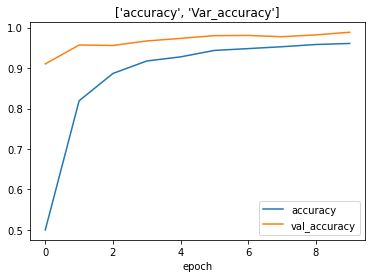

In [ ]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.xlabel('epoch')
plt.title(['accuracy','Var_accuracy'])
plt.legend(['accuracy','val_accuracy'])
# plt.show()

In [ ]:
score=model.evaluate(X_test,y_test,verbose=0)
print(type(score))
print('Test score:',score[0])
print('Test accuracy :',score[1])

(-0.5, 1299.5, 955.5, -0.5)

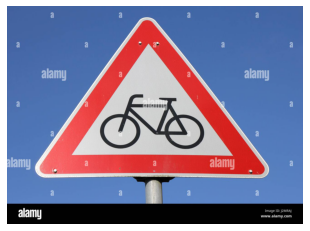

In [ ]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis('off')

(32, 32)


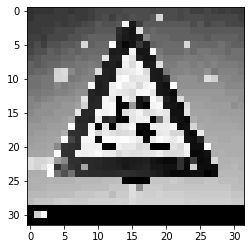

In [ ]:
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
 
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 


In [ ]:
#Test image
Prediction=np.argmax(model.predict(img),axis=1)
print("predicted sign: "+ str(Prediction))

predicted sign: [30]
